# Investigating Titanic Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
# Load data
df = pd.read_csv('titanic.csv')

# dfst = pd.read_csv('d:/data/data/stroke.csv')
# dfsup = pd.read_csv('d:/data/superstore.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# I’m not going to analyze the number of Siblings/Spouses or Parents/Children isolatedly. Instead I am using the presence 
# or not of family members aboard, represented by the ‘Family’ column.
df['Family'] = (df['SibSp'] > 0) | (df['Parch'] > 0)
df['Family']

0       True
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Family, Length: 891, dtype: bool

In [11]:
# I need a column stating if a passenger is a child or an adult. 15 is going to be the childhood age threshold 
# for our study.

df['AgeRange'] = pd.cut(df['Age'], [0, 15, 80], labels=['child', 'adult'])
df['AgeRange']

0      adult
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887    adult
888      NaN
889    adult
890    adult
Name: AgeRange, Length: 891, dtype: category
Categories (2, object): ['child' < 'adult']

In [12]:
# Now I’m getting rid of the data we are not going to use: 
# df.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let’s raise some questions:

In [14]:
# 1-What is the survival rate by class, sex and age? What about combining these factors?
# 2-Was the fare the same for men and women?
# 3-What fraction of the passengers embarked on each port? Is there a difference in their survival rates?
# 4-Is the presence of a family member a good indicator for survival?

## 1. What is the survival rate by class, sex and age? What about combining these factors?

In [15]:
df_clean_age = df.dropna(subset=['Age'])
df_clean_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,True,adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,adult


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

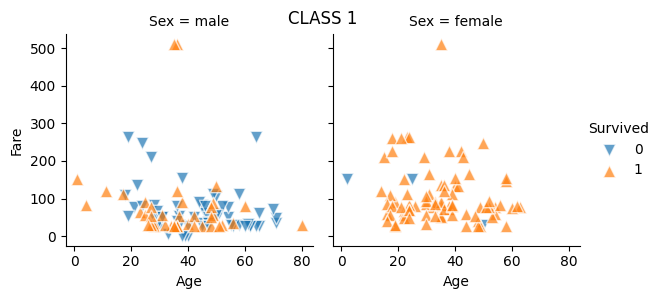

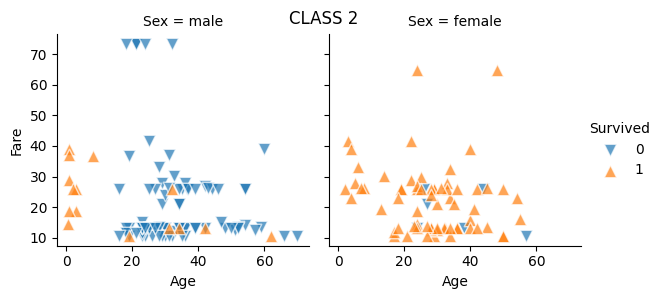

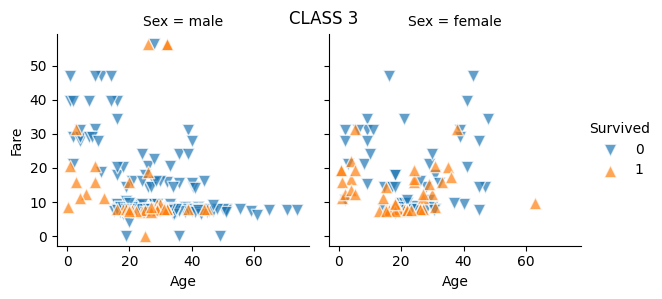

In [18]:
def scatter_plot_class(pclass):
    g = sns.FacetGrid(df_clean_age[df_clean_age['Pclass'] == pclass], 
                      col='Sex',
                      col_order=['male', 'female'],
                      hue='Survived', 
                      hue_kws=dict(marker=['v', '^']))
    g = (g.map(plt.scatter, 'Age', 'Fare', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('CLASS {}'.format(pclass))

# plotted separately because the fare scale for the first class makes it difficult to visualize second and third class charts
scatter_plot_class(1)
scatter_plot_class(2)
scatter_plot_class(3)

In [ ]:
# It seems like women have a much higher survival rate, specially in first and second classes. 
# It seems too that children have a higher survival rate, specially in first and second classes again. 
# Let’s find out the survival rate by class, sex and age range, and plot the results for a better understanding:

In [ ]:
survived_by_class = df_clean_age.groupby('Pclass')['Survived'].mean()
survived_by_class

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [ ]:
survived_by_sex = df_clean_age.groupby('Sex')['Survived'].mean()
survived_by_sex

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

In [ ]:
survived_by_age = df_clean_age.groupby('AgeRange')['Survived'].mean()
survived_by_age

AgeRange
child    0.590361
adult    0.381933
Name: Survived, dtype: float64

(0.0, 1.0)

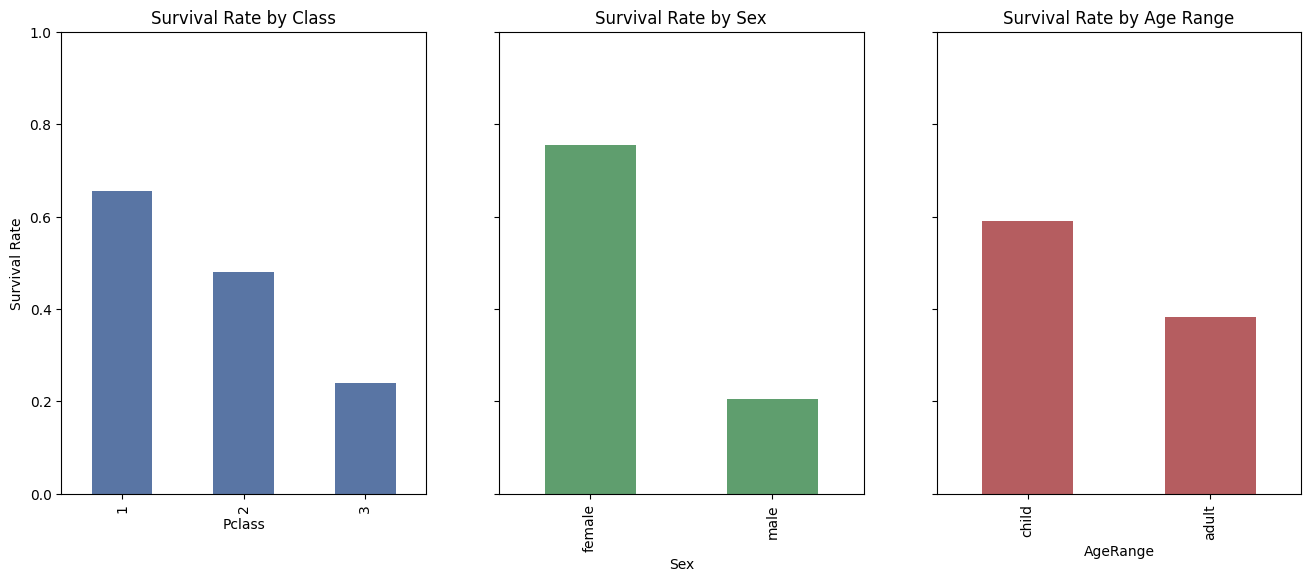

In [ ]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))

ax = survived_by_class.plot.bar(ax=axis1, color='#5975A4', title='Survival Rate by Class', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)

ax = survived_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0,1.0)

ax = survived_by_age.plot.bar(ax=axis3, color='#B55D60', title='Survival Rate by Age Range', sharey=True)
ax.set_ylim(0.0,1.0)

In [ ]:
# As expected (since we all watched the Titanic movie 😉), the first class has a higher survival rate than the second, 
# which has a higher survival rate than the third, and women and children have a higher chance of survival than men 
# and adults, respectively.

In [ ]:
# Now combining the three factors and visualizing the plots:

grouped_data = pd.concat(
    [df_clean_age.groupby(['Pclass', 'Sex', 'AgeRange'])['Survived'].mean(),
     df_clean_age.groupby(['Pclass', 'Sex', 'AgeRange'])['Survived'].count()],
    axis=1)
grouped_data.columns = ['Survived', 'Count']
grouped_data

Survived  Count
Pclass Sex    AgeRange                 
1      female child     0.666667      3
              adult     0.975610     82
       male   child     1.000000      3
              adult     0.377551     98
2      female child     1.000000     10
              adult     0.906250     64
       male   child     1.000000      9
              adult     0.066667     90
3      female child     0.533333     30
              adult     0.430556     72
       male   child     0.321429     28
              adult     0.128889    225

C:\Users\aicyb\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


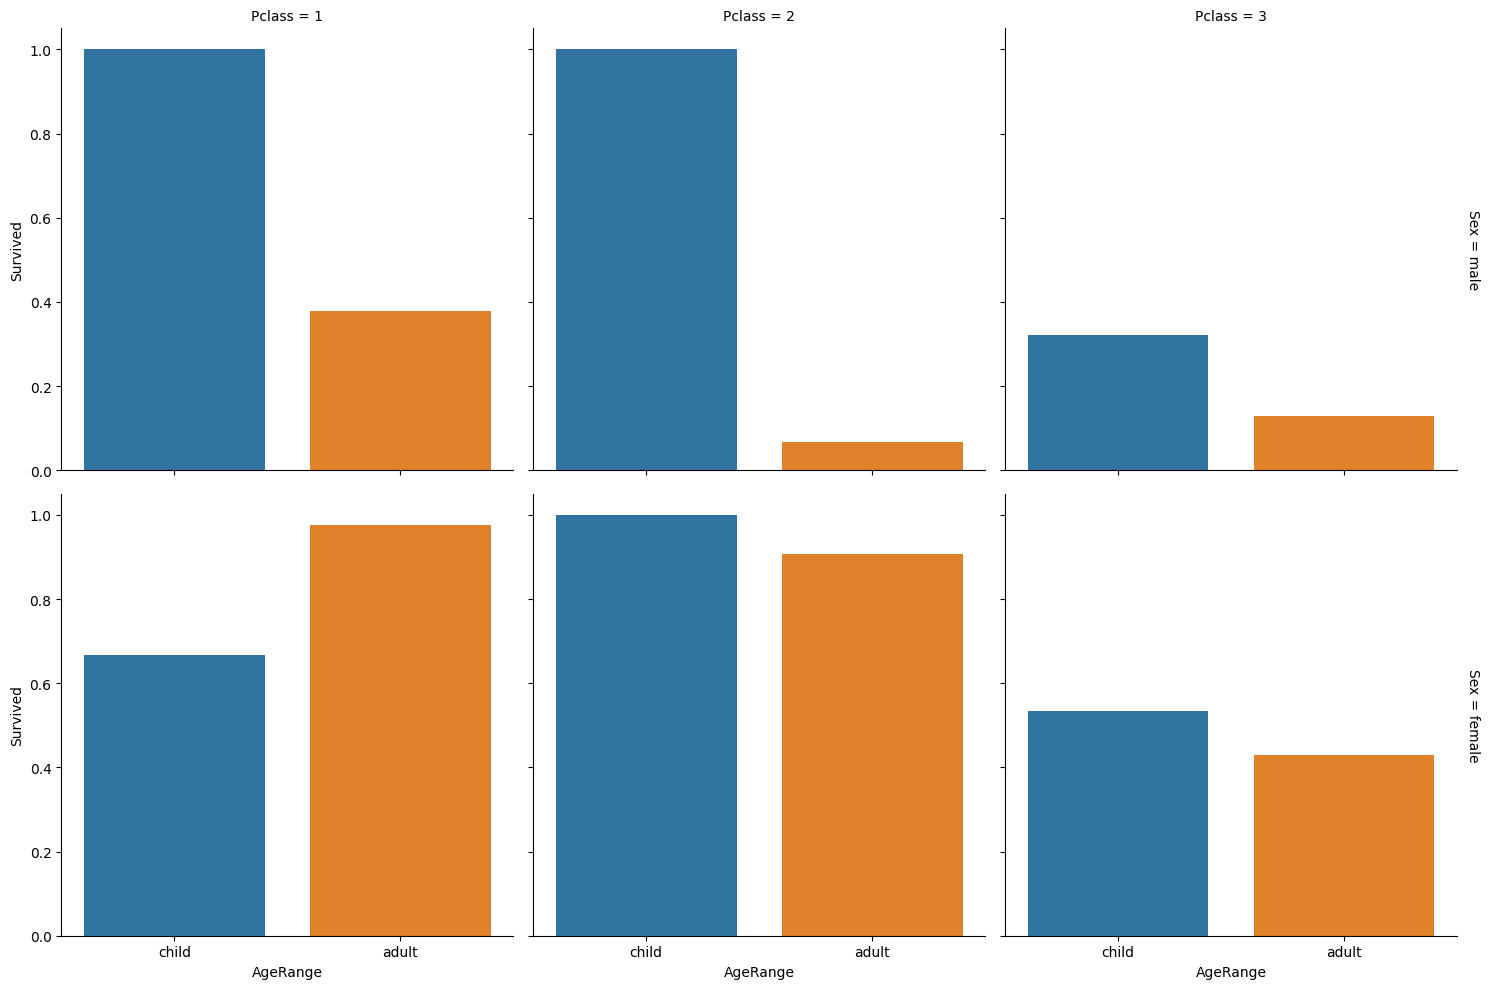

In [ ]:
g = sns.factorplot(
    x='AgeRange', 
    y='Survived', 
    
    col='Pclass',
    
    row='Sex',
    
    data=df_clean_age,
    margin_titles=True, 
    kind="bar", 
    ci=None)

In [ ]:
# Analysing the three factors combined gives us expected results too. It is interesting to see that even the women 
# from the third class have a higher survival rate than the men from first. It indicates that saving women had a 
# higher priority than saving the richer classes.
# Saving children also seemed like a higher priority as on all permutations of factors except first class women, 
# where one of three female children died, they had a higher survival rate.

# So we can conclude that saving women and children was indeed a priority on the Titanic shipwreck.

## 2. Was the fare the same for men and women?

In [ ]:
# While looking at the scatter plots shown in the first question I noticed that women seemed to be more spreaded among 
# the ‘Fare’ axis, so it motivated me to check if the average fare paid by women was really higher than men’s.

# Let’s check the mean fare paid by each sex

In [ ]:
fare_by_sex = df.groupby('Sex')['Fare'].mean()
fare_by_sex

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

Text(0, 0.5, 'Average Fare')

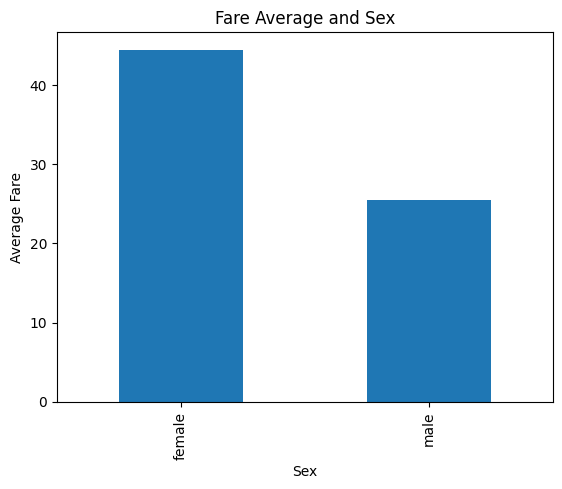

In [ ]:
ax = fare_by_sex.plot.bar(title='Fare Average and Sex')
ax.set_ylabel('Average Fare')

In [ ]:
# It indeed seems that women paid way more than men on average. Women’s average fare is higher than I expected. 
# Maybe it is due to the women of the first class. 
# Let’s group the data by class and check it out:

In [ ]:
fare_by_class_sex = df.groupby(['Pclass', 'Sex'])['Fare'].mean()
fare_by_class_sex

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

Text(0, 0.5, 'Average Fare')

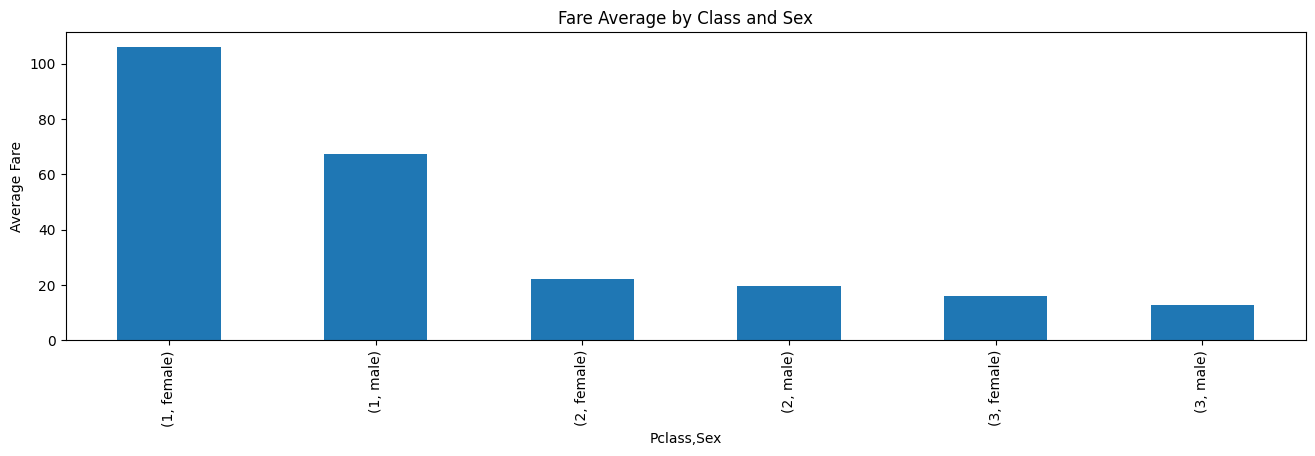

In [ ]:
ax = fare_by_class_sex.plot.bar(figsize=(16,4), title='Fare Average by Class and Sex')
ax.set_ylabel('Average Fare')

In [ ]:
# The average fare paid by women is higher than men’s on every class, although the fares on second class are almost equal. 
# I wonder why women paid more… Maybe they demanded more privileges than men, but who knows…

## 3. What fraction of the passengers embarked on each port? Is there a difference in their survival rates?

In [ ]:
# Just for curiosity’s sake, let’s find out the proportion of passengers embarked on each port 
# (C = Cherbourg; Q = Queenstown; S = Southampton), and their survival rates, but first, removing rows with missing 
# embarkment values:

df_clean_embarked = df.dropna(subset=['Embarked'])

In [ ]:
embarked = df_clean_embarked.groupby('Embarked').mean()
embarked['Count'] = df_clean_embarked['Embarked'].value_counts()
embarked

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Count
Embarked,,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.494048,168
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.259740,77
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.389752,644


<Axes: xlabel='Embarked', ylabel='Survived'>

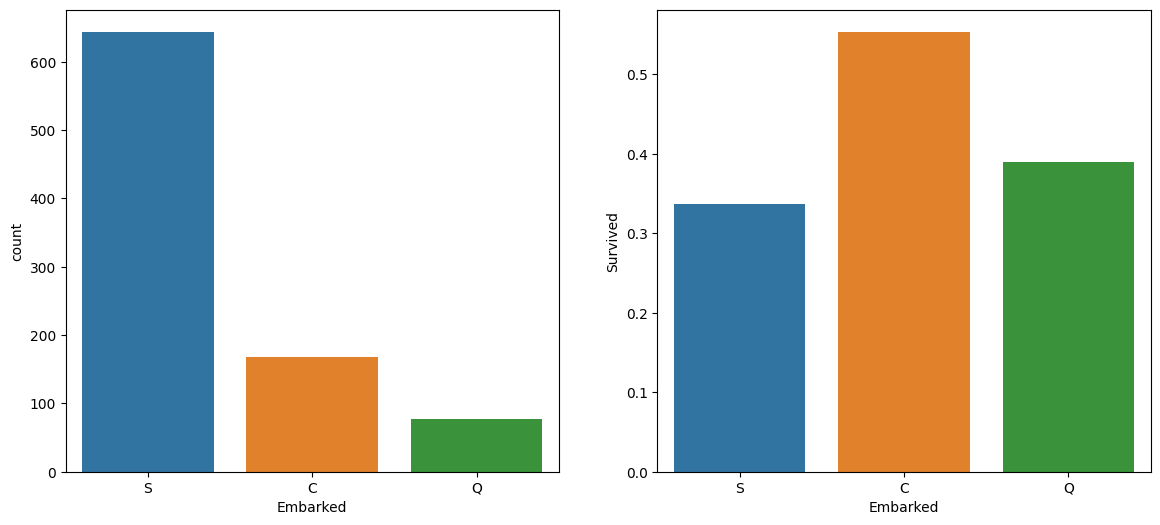

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x='Embarked', data=df_clean_embarked, order=['S','C','Q'], ax=axis1)
sns.barplot(x=embarked.index, y='Survived', data=embarked, order=['S','C','Q'], ax=axis2)

In [ ]:
# The survival rate for passengers embarked on Cherbourg is higher than both other ports’. That is no wonder, since the 
# mean ‘Pclass’ value for this port is 1.89 - way lower than Queenstown’s 2.91 and Southampton’s 2.35 - which means 
# that people that embarked there belonged to richer classes, which we’ve already seen that have better survival rates 
# than the poorer ones.

## 4. Is the presence of a family member a good indicator for survival?

In [ ]:
#Finally, let’s check if having a family member aboard means a higher survival chance:

survived_by_family = df_clean_age.groupby('Family')['Survived'].mean()
survived_by_family

Family
False    0.321782
True     0.516129
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival Rate')

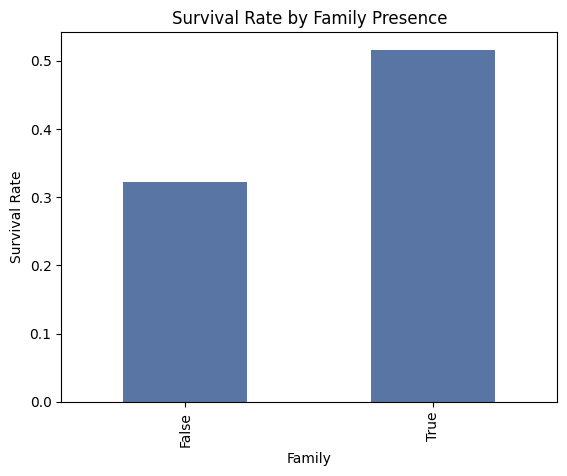

In [ ]:
ax = survived_by_family.plot.bar(color='#5975A4', title='Survival Rate by Family Presence')
ax.set_ylabel('Survival Rate')

In [ ]:
#The data shows that having a family member aboard indicates a better chance for survival. But why is that?
#Let’s family_by_class = titanic_df_clean_age.groupby('Pclass')['Family'].mean()

In [ ]:
family_by_class = df_clean_age.groupby('Pclass')['Family'].mean()
family_by_class

Pclass
1    0.537634
2    0.462428
3    0.366197
Name: Family, dtype: float64

In [ ]:
family_by_sex = df_clean_age.groupby('Sex')['Family'].mean()
family_by_sex

Sex
female    0.616858
male      0.328918
Name: Family, dtype: float64

In [ ]:
family_by_age = df_clean_age.groupby('AgeRange')['Family'].mean()
family_by_age

AgeRange
child    0.927711
adult    0.369255
Name: Family, dtype: float64

(0.0, 1.0)

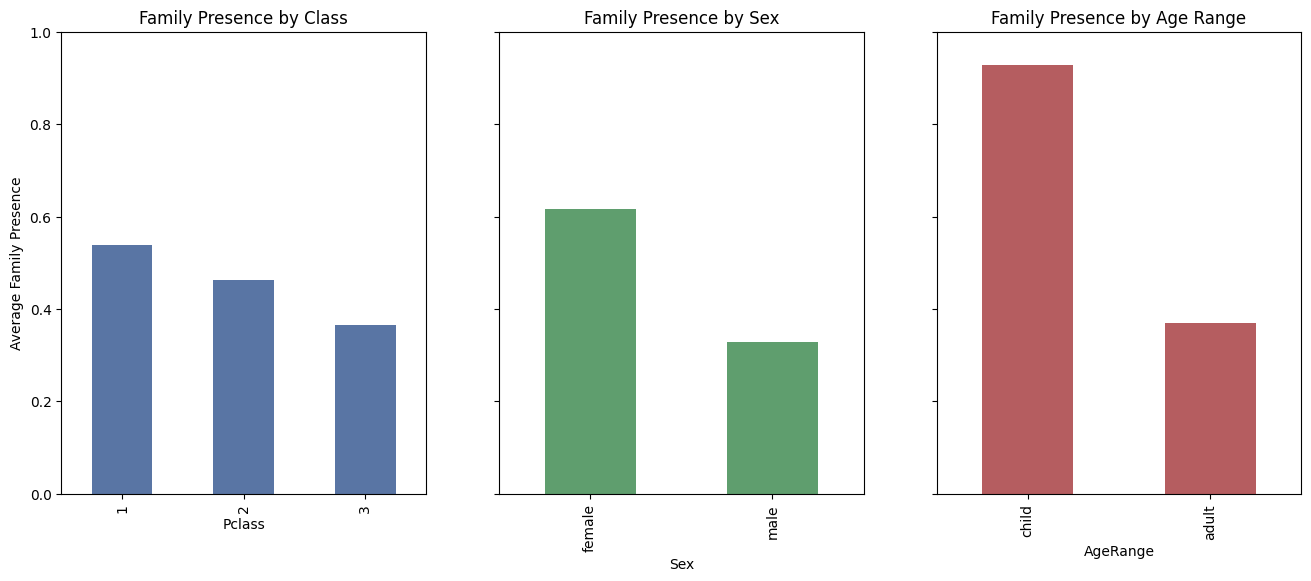

In [ ]:
ig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))

ax = family_by_class.plot.bar(ax=axis1, color='#5975A4', title='Family Presence by Class', sharey=True)
ax.set_ylabel('Average Family Presence')
ax.set_ylim(0.0,1.0)

ax = family_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Family Presence by Sex', sharey=True)
ax.set_ylim(0.0,1.0)

ax = family_by_age.plot.bar(ax=axis3, color='#B55D60', title='Family Presence by Age Range', sharey=True)
ax.set_ylim(0.0,1.0)

In [ ]:
# We can see that family presence is higher on: - first class; - female sex; - children.
# We have already discovered that these three factors show a higher survival rate, so maybe the higher 
# survival rate for passengers with family members is more due to them than to the presence of family itself.